In [1]:
from time import time
startTime = time()
startTime

1561387263.5857952

# PKHG direct aproach 8 queen problem
## using z3

# And possibility to show a solution-chess-board

In [2]:
from z3 import *
# helper function in fpdata
!ls *.py  

fpdata.py


In [3]:
%matplotlib inline
import numpy as np
#from __future__ import print_function
import matplotlib
matplotlib.use('nbagg')
print(matplotlib.get_backend())
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

# for later plotting of queens on chess-board

nbAgg


In [4]:
# 8x8 chess board
X = [ [ Int("x_%s_%s" % (i, j)) for j in range(8) ]
      for i in range(8) ]
X

[[x_0_0, x_0_1, x_0_2, x_0_3, x_0_4, x_0_5, x_0_6, x_0_7],
 [x_1_0, x_1_1, x_1_2, x_1_3, x_1_4, x_1_5, x_1_6, x_1_7],
 [x_2_0, x_2_1, x_2_2, x_2_3, x_2_4, x_2_5, x_2_6, x_2_7],
 [x_3_0, x_3_1, x_3_2, x_3_3, x_3_4, x_3_5, x_3_6, x_3_7],
 [x_4_0, x_4_1, x_4_2, x_4_3, x_4_4, x_4_5, x_4_6, x_4_7],
 [x_5_0, x_5_1, x_5_2, x_5_3, x_5_4, x_5_5, x_5_6, x_5_7],
 [x_6_0, x_6_1, x_6_2, x_6_3, x_6_4, x_6_5, x_6_6, x_6_7],
 [x_7_0, x_7_1, x_7_2, x_7_3, x_7_4, x_7_5, x_7_6, x_7_7]]

In [5]:
# first 8 upper LR diagonals
# diagonal from Left to Right (counting upwards)

def diagLRUP(i):
    diagup = [X[j - i][j] for j in range(i, 8)]
    result = sum(diagup) <= 1
    return result

#diagLRUP(1)

LRUP = [diagLRUP(i) for i in range(8)]
LRUP

[0 +
 x_0_0 +
 x_1_1 +
 x_2_2 +
 x_3_3 +
 x_4_4 +
 x_5_5 +
 x_6_6 +
 x_7_7 <=
 1, 0 + x_0_1 + x_1_2 + x_2_3 + x_3_4 + x_4_5 + x_5_6 + x_6_7 <=
 1, 0 + x_0_2 + x_1_3 + x_2_4 + x_3_5 + x_4_6 + x_5_7 <= 1, 0 + x_0_3 + x_1_4 + x_2_5 + x_3_6 + x_4_7 <= 1, 0 + x_0_4 + x_1_5 + x_2_6 + x_3_7 <= 1, 0 + x_0_5 + x_1_6 + x_2_7 <= 1, 0 + x_0_6 + x_1_7 <= 1, 0 + x_0_7 <= 1]

In [6]:
# Left Right diagonals (counting downwards)
def diagLRDOWN(i):
    result = sum([X[j][j - i] for j in range(i , 8)]) <= 1
    return result
#diagLRDOWN(2)

In [7]:
# the missing LR diogonals
LRDOWN =[diagLRDOWN(i) for i in range(1,7)]
LRDOWN

[0 + x_1_0 + x_2_1 + x_3_2 + x_4_3 + x_5_4 + x_6_5 + x_7_6 <=
 1,
 0 + x_2_0 + x_3_1 + x_4_2 + x_5_3 + x_6_4 + x_7_5 <= 1,
 0 + x_3_0 + x_4_1 + x_5_2 + x_6_3 + x_7_4 <= 1,
 0 + x_4_0 + x_5_1 + x_6_2 + x_7_3 <= 1,
 0 + x_5_0 + x_6_1 + x_7_2 <= 1,
 0 + x_6_0 + x_7_1 <= 1]

In [8]:
# now digonals from Right to Left (counint downwares)
def diagRLDOWN(i): 
    result = sum([X[j][ 7 - j + i] for j in range(i,8)]) <= 1
    return result

RLDOWN = [diagRLDOWN(i) for i in range(7)]
RLDOWN


[0 +
 x_0_7 +
 x_1_6 +
 x_2_5 +
 x_3_4 +
 x_4_3 +
 x_5_2 +
 x_6_1 +
 x_7_0 <=
 1, 0 + x_1_7 + x_2_6 + x_3_5 + x_4_4 + x_5_3 + x_6_2 + x_7_1 <=
 1, 0 + x_2_7 + x_3_6 + x_4_5 + x_5_4 + x_6_3 + x_7_2 <= 1, 0 + x_3_7 + x_4_6 + x_5_5 + x_6_4 + x_7_3 <= 1, 0 + x_4_7 + x_5_6 + x_6_5 + x_7_4 <= 1, 0 + x_5_7 + x_6_6 + x_7_5 <= 1, 0 + x_6_7 + x_7_6 <= 1]

In [9]:
# RL digonals the upper ones
def diagRLUP(m):
    #result = []
    result = sum([X[j - 1][ m-j ] for j in range(1, m  + 1) ]) <= 1
    return result

#diagRLUP(6)

In [10]:
# the other RL diagonals
RLUP = [diagRLUP(i) for i in range(2,8)]
RLUP
        

[0 + x_0_1 + x_1_0 <= 1,
 0 + x_0_2 + x_1_1 + x_2_0 <= 1,
 0 + x_0_3 + x_1_2 + x_2_1 + x_3_0 <= 1,
 0 + x_0_4 + x_1_3 + x_2_2 + x_3_1 + x_4_0 <= 1,
 0 + x_0_5 + x_1_4 + x_2_3 + x_3_2 + x_4_1 + x_5_0 <= 1,
 0 + x_0_6 + x_1_5 + x_2_4 + x_3_3 + x_4_2 + x_5_1 + x_6_0 <=
 1]

# 0 means empty 1 means a queen


In [11]:
cells_c  = [ And(0 <= X[i][j], X[i][j] <= 1)
             for i in range(8) for j in range(8) ]
#cells_c


# each from the 8 columns/rows contains less than 2 queens

In [12]:
allcolCells = [ sum([X[i][j] for i in range(8)]) <= 1 
            for j in range(8)]
#allcolCells

allrowCells = [ sum([X[i][j] for j in range(8)]) <= 1 
            for i in range(8)]


# start with all cells

In [13]:
all2Cells = [ X[i][j] for i in range(8)
            for j in range(8)]
#all2Cells


# there must be 8 queens

In [14]:
cond8queens  = sum(all2Cells) == 8

<img src="../eightqueens.png"/>

# All solution, less then 100?

In [15]:
allFoundSolutions = {}
counter = 0
showCounter = False
maxaantal = 100
from z3 import * 

#search for a first solution
s = Solver()
s.add(cells_c)
s.add(allcolCells)
s.add(allrowCells)
s.add(LRUP)
s.add(LRDOWN)
s.add(RLDOWN)
s.add(RLUP)
s.add(cond8queens)
if s.check() == sat:
    m = s.model()
    r = [(i,j)  for j in range(8) 
        for i in range(8) if  m.evaluate(X[i][j]) == 1]
    print("first solution =" , r)
    allFoundSolutions[0] = r
#s.add(alldiags)
#PKHG>TODO ophalen from mydateFP import getFPnameDate
vals = [X[i][j] == m.evaluate(X[i][j]) for j in range(8)
        for i in range(8)]
s.add(Not(And(vals)))


while s.check() == sat and counter <= maxaantal:
    counter += 1
    m = s.model()
    r = [(i,j)  for j in range(8) 
        for i in range(8) if  m.evaluate(X[i][j]) == 1]
    
    #save solution (for inspection here)
    allFoundSolutions[counter] = r
    if showCounter:
        print("counter = ", counter)
    #print_matrix(r)
    vals = [X[i][j] == m.evaluate(X[i][j]) for j in range(8)
            for i in range(8)]
    s.add(Not(And(vals)))
  
 
from fpdata import getFPnameDate

    

first solution = [(1, 0), (5, 1), (7, 2), (2, 3), (0, 4), (3, 5), (6, 6), (4, 7)]


In [16]:
len(allFoundSolutions.keys())

92

In [17]:
!cat fpdata.py

def getFPnameDate(voor = "eightQueens", showname = False):
    from datetime  import datetime
    d0, d1  = str(datetime.now()).split(" ")
    #print (d0,d1)
    result =  "./resultfiles/" + voor + (d0[5:] + "_" + d1[0:2] + d1[3:5]).replace("-","") + ".py"
    if showname:
        print(result)
    return result
#getFPnameDate()


In [18]:
from fpdata import *
solutionsFilename = getFPnameDate()
solutionsFilename

'./resultfiles/eightQueens0624_1641.py'

In [19]:
fp = open(solutionsFilename,"w")
for i, sol in enumerate(allFoundSolutions.values()):
    fp.write('sol' + str(i) + "=" + str(sol) +'\n')
fp.close()

In [20]:
from resultfiles.eightQueens0624_1619 import *

In [21]:
print(sol0,"\n ...\n",sol91) #zero based python ;-)

[(1, 0), (5, 1), (7, 2), (2, 3), (0, 4), (3, 5), (6, 6), (4, 7)] 
 ...
 [(3, 0), (0, 1), (4, 2), (7, 3), (5, 4), (2, 5), (6, 6), (1, 7)]


# from wikipedia:
Number of different solutions are **<font color="red"> 92 </font>**

# other approach, elegant but how to find
### other different solutions in a loop?

In [22]:
from z3 import *
# We know each queen must be in a different row.
# So, we represent each queen by a single integer: the column position
Q = [ Int('Q_%i' % (i + 1)) for i in range(8) ]

# Each queen is in a column {1, ... 8 }
val_c = [ And(1 <= Q[i], Q[i] <= 8) for i in range(8) ]

#PKHG>??? 
val_c.append( Not(Q[0] == 2))
# At most one queen per column
col_c = [ Distinct(Q) ]

# Diagonal constraint
diag_c = [ If(i == j, 
              True, 
              And(Q[i] - Q[j] != i - j, Q[i] - Q[j] != j - i)) 
           for i in range(8) for j in range(i) ]

s = Solver()
#s.add([val_c + col_c + diag_c])
#print(s.check())       
solve(val_c + col_c + diag_c)


[Q_5 = 6,
 Q_8 = 8,
 Q_3 = 5,
 Q_2 = 7,
 Q_6 = 1,
 Q_4 = 2,
 Q_7 = 3,
 Q_1 = 4]


# no val_c.append gives:
```
[Q_5 = 4,
 Q_8 = 5,
 Q_3 = 1,
 Q_2 = 6,
 Q_6 = 8,
 Q_4 = 7,
 Q_7 = 3,
 Q_1 = 2]
 ```

# Preparations chess-board

In [23]:
boardSize = 256
quadSize = 32
baseSize = int(boardSize/quadSize)
baseSize
nrOfQuads = baseSize ** 2
#print("quads 8x8=", nrOfQuads)
rows = baseSize
cols = baseSize

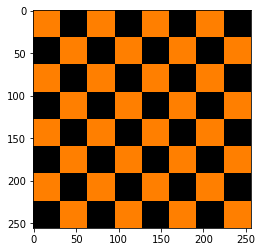

In [24]:
#import numpy as np
def blackwhiteboard():
    global myblack
    myblack = np.zeros((256,256,3))
    plt.imshow(myblack)
    boardSize = 256
    quadSize = 32
    baseSize = int(boardSize/quadSize)
    #baseSize
    nrOfQuads = baseSize ** 2; 
    #print("quads 8x8=", nrOfQuads)
    rows = baseSize
    cols = baseSize
    for bb in range(4):                                                       
        for aa in [0, 2, 4, 6]:
            for i in range(32):
                for j in range(32):
                    myblack[i + bb * 64, j + aa * quadSize, 0] = 1
                    myblack[i + bb * 64, j + aa * quadSize, 1 ] = 0.5
                    myblack[i + bb * 64, j + aa * quadSize, 2] = 0

        for aa in [1,3,5,7]:
            for i in range(32):
                for j in range(32):
                    myblack[i + quadSize + bb * 2 * quadSize, j + aa * quadSize, 0] = 1
                    myblack[i + quadSize + bb * 2 * quadSize, j + aa * quadSize, 1 ] = 0.5
                    myblack[i + quadSize + bb * 2 * quadSize, j + aa * quadSize, 2] = 0

blackwhiteboard()
plt.imshow(myblack)

# a 32x32 queens-picture, to be used

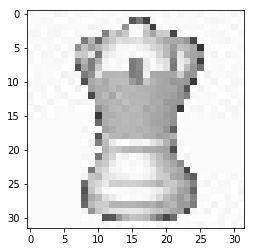

In [25]:
nuq = plt.imread('nqueenw_32x32.jpg')
nuqAd = nuq/256.0
plt.imshow(nuqAd)
#nuqAd = nuq/256.0
#plt.imshow(nuqAd)


In [26]:
# example: coordinates for quees to place
allFoundSolutions[2]

[(4, 0), (6, 1), (1, 2), (5, 3), (2, 4), (0, 5), (7, 6), (3, 7)]

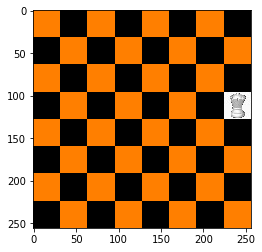

In [27]:
#PKHG> One check
blackwhiteboard()
xi, yi = allFoundSolutions[2][7]
for i in range(32):
    for j in range(32):
        #print(nuqAd[i,j],"  \t", myblack[i,j])
        myblack[i + 32 * xi,j + yi * 32] = nuqAd[i,j] 
        #print(nuqAd[i,j],"  \t", myblack[i,j])
plt.imshow(myblack)        

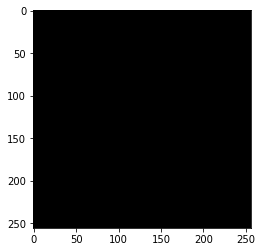

In [28]:
#create the the first 10 solution in chess-boards
pictureK = {}
for k in range(10):
    blackwhiteboard()
#plt.imshow(myblack)
    which = k 
    for xi, yi in allFoundSolutions[which]:
        for i in range(32):
            for j in range(32):
                myblack[i + 32 * xi,j + yi * 32] = nuqAd[i,j] 
    pictureK[k] = myblack        

In [29]:
# taking only 6, takes some time herer at PKHG ;-(
fig=plt.figure(3, figsize=(256,256))
for i in range(6):
    img = pictureK[i]
    fig.add_subplot(3, 2, i + 1)
    plt.imshow(img)
#plt.show()

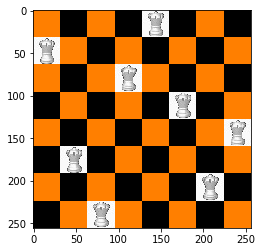

In [30]:
plt.imshow(pictureK[0])

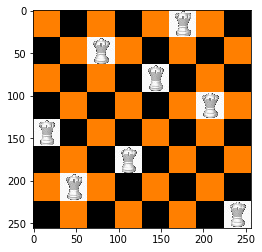

In [31]:
plt.imshow(pictureK[1])

In [32]:
print("time total execution of this notebook is")
print(time() - startTime)

time total execution of this notebook is
84.2264609336853
